In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-place-sales/pizza_types.csv
/kaggle/input/pizza-place-sales/orders.csv
/kaggle/input/pizza-place-sales/order_details.csv
/kaggle/input/pizza-place-sales/pizzas.csv


# Pizza Place Sales Analysis

![](https://curlytales.com/wp-content/uploads/2019/09/feature-1-1024x682.jpg)

# Data Understanding

#### Read pizza_types CSV files using pandas, check null values and all data type info

In [7]:
pizza_types= pd.read_csv('/kaggle/input/pizza-place-sales/pizza_types.csv', index_col=None, header=0, encoding='unicode_escape')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [8]:
pizza_types['category'].value_counts()

Supreme    9
Veggie     9
Classic    8
Chicken    6
Name: category, dtype: int64

In [9]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


#### Read orders CSV files using pandas, check null values and all data type info

In [10]:
orders=pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv")
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


##### Here we found date and time data type is object. so we have to change it.

In [12]:
orders['date']=pd.to_datetime(orders['date'])
orders['time']=pd.to_datetime(orders['time'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


#### Read order_details CSV files using pandas, check null values and all data type info

In [13]:
order_details=pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv")
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [14]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### Read pizzas CSV files using pandas, check null values and all data type info

In [15]:
pizzas=pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv")
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [16]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


# Data Preprocessing

## Now we merge two csv file for more details

##### Here we are merging order details data frame to orders, so that we can get all information about orders in 1 table 

In [17]:
All_orders_info=order_details.merge(orders, how='inner', on=['order_id'])
All_orders_info.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,2023-04-30 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,2023-04-30 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,2023-04-30 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,2023-04-30 11:57:40
4,5,2,mexicana_m,1,2015-01-01,2023-04-30 11:57:40


In [18]:
All_orders_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 2.6+ MB


##### Here we are merging pizzas data frame to pizza_types, so that we can get all information about pizzas in 1 table 

In [19]:
All_pizza_info=pizzas.merge(pizza_types, how="inner", on=['pizza_type_id'])
All_pizza_info.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [20]:
All_pizza_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
 4   name           96 non-null     object 
 5   category       96 non-null     object 
 6   ingredients    96 non-null     object 
dtypes: float64(1), object(6)
memory usage: 6.0+ KB


## Final Dataframe

##### Finally, we are merging all info about order dataframe and pizza info dataframe

In [21]:
final=All_orders_info.merge(All_pizza_info,how='inner', on=['pizza_id'])
final.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,2023-04-30 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,2023-04-30 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,2023-04-30 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,2023-04-30 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,2023-04-30 20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [22]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.8+ MB


#### Now, we have our final data frame with 48620 unique values and no null values, so we can start our analysis

# Data Visualization

In [23]:
df=final.sort_values(by=['order_details_id'])

In [24]:
df.set_index(['order_details_id'])

,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
order_details_id,,,,,,,,,,,
1,1,hawaiian_m,1,2015-01-01,2023-04-30 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,2,classic_dlx_m,1,2015-01-01,2023-04-30 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
3,2,five_cheese_l,1,2015-01-01,2023-04-30 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
4,2,ital_supr_l,1,2015-01-01,2023-04-30 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
5,2,mexicana_m,1,2015-01-01,2023-04-30 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,2015-12-31,2023-04-30 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48617,21348,four_cheese_l,1,2015-12-31,2023-04-30 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48618,21348,napolitana_s,1,2015-12-31,2023-04-30 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."


### No of pizzas sold as per category

In [25]:
df['category'].value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

### No of pizzas sold as per size in year


In [26]:
df['size'].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: size, dtype: int64

### Grouping of pizza_id with sum of price

In [27]:
pizza_id_sales=df.groupby(['pizza_id']) ['price'].sum().sort_values(ascending=False)


### 10 pizzas that got us the most sales

In [28]:
pizza_id_sales.head(10)

pizza_id
thai_ckn_l       28323.75
five_cheese_l    25141.50
four_cheese_l    22850.35
spicy_ital_l     22576.00
big_meat_s       21732.00
southw_ckn_l     20604.75
bbq_ckn_l        20065.25
cali_ckn_l       18571.25
classic_dlx_m    18544.00
mexicana_l       17091.00
Name: price, dtype: float64

### 10 pizzas that sold us the least

In [29]:
pizza_id_sales.tail(10)

pizza_id
the_greek_s       3600.00
ital_cpcllo_s     3600.00
soppressata_s     3600.00
mediterraneo_s    3456.00
ital_supr_s       2425.00
mexicana_s        1920.00
green_garden_l    1903.50
ckn_alfredo_s     1224.00
calabrese_s       1212.75
the_greek_xxl     1006.60
Name: price, dtype: float64

# 1.How many customers do we have each day? Are there any peak hours?

In [30]:
df['date'].value_counts()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: date, Length: 358, dtype: int64

In [31]:
df['date'].value_counts().mean()

135.81005586592178

#### Calculating Peak time according to sales

In [32]:

sales_time=df.groupby(['time']) ['price'].sum().sort_values(ascending=False)
sales_time.head(20)

time
2023-04-30 12:32:00    448.20
2023-04-30 12:53:29    387.00
2023-04-30 11:59:10    379.00
2023-04-30 12:26:04    377.40
2023-04-30 12:52:36    367.75
2023-04-30 13:31:27    349.90
2023-04-30 12:18:44    341.20
2023-04-30 12:25:12    338.70
2023-04-30 13:04:13    336.00
2023-04-30 13:00:20    330.50
2023-04-30 11:50:01    330.50
2023-04-30 13:57:38    330.45
2023-04-30 11:57:15    330.25
2023-04-30 13:35:54    327.50
2023-04-30 13:23:41    314.25
2023-04-30 12:14:18    312.15
2023-04-30 13:41:22    311.00
2023-04-30 13:58:37    309.75
2023-04-30 12:58:32    309.60
2023-04-30 12:40:39    307.25
Name: price, dtype: float64

peak time-12 to 1 pm

In [33]:
sales_time.plot

### Calculating peak time according to pizza

In [34]:
df['hour'] = pd.to_datetime(df['time'], infer_datetime_format=True).dt.hour

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 7364
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  hour              48620 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(6)
memory usage: 5.2+ MB


In [36]:
time=df['hour'].value_counts().sort_values(ascending=False)
time.head(20)

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: hour, dtype: int64

Text(0.5, 1.0, 'peak time')

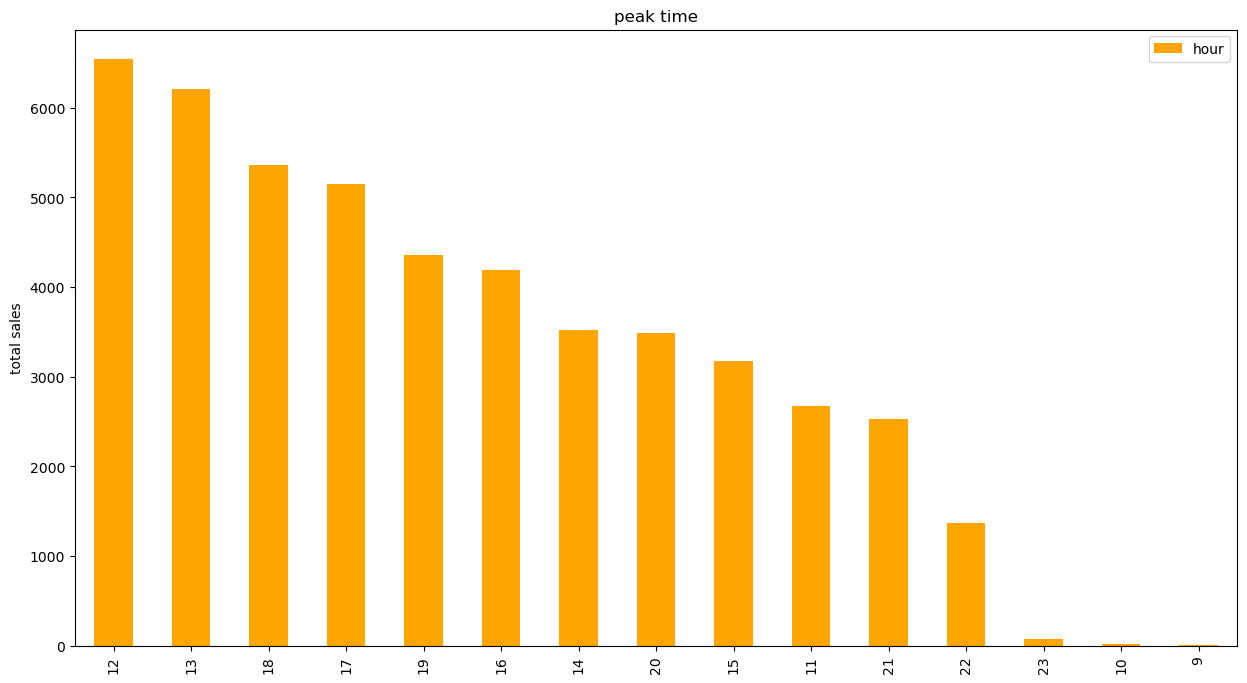

In [40]:
import matplotlib.pyplot as plt
time.head(30).to_frame().plot(kind='bar',color='orange',figsize=(15,8))
plt.ylabel('total sales')
plt.title('peak time' )

### Conclusion<br>
- Highest peak time - **12 to 1 pm (noon time)**
- Second highest peak time- **5 to 6 pm( evening time)**
- Average **135** pizza sales per day

# 2.How many pizzas are typically in order? Do we have any bestsellers?

In [41]:
df['quantity'].value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

In [42]:
pizza_id_sales=df.groupby(['pizza_id']) ['price'].sum().sort_values(ascending=False)

In [43]:
pizza_id_sales.head(10)

pizza_id
thai_ckn_l       28323.75
five_cheese_l    25141.50
four_cheese_l    22850.35
spicy_ital_l     22576.00
big_meat_s       21732.00
southw_ckn_l     20604.75
bbq_ckn_l        20065.25
cali_ckn_l       18571.25
classic_dlx_m    18544.00
mexicana_l       17091.00
Name: price, dtype: float64

##### Top 10 most sold as per no of times ordered

Text(0.5, 1.0, 'Top 10 most sold as per revenue')

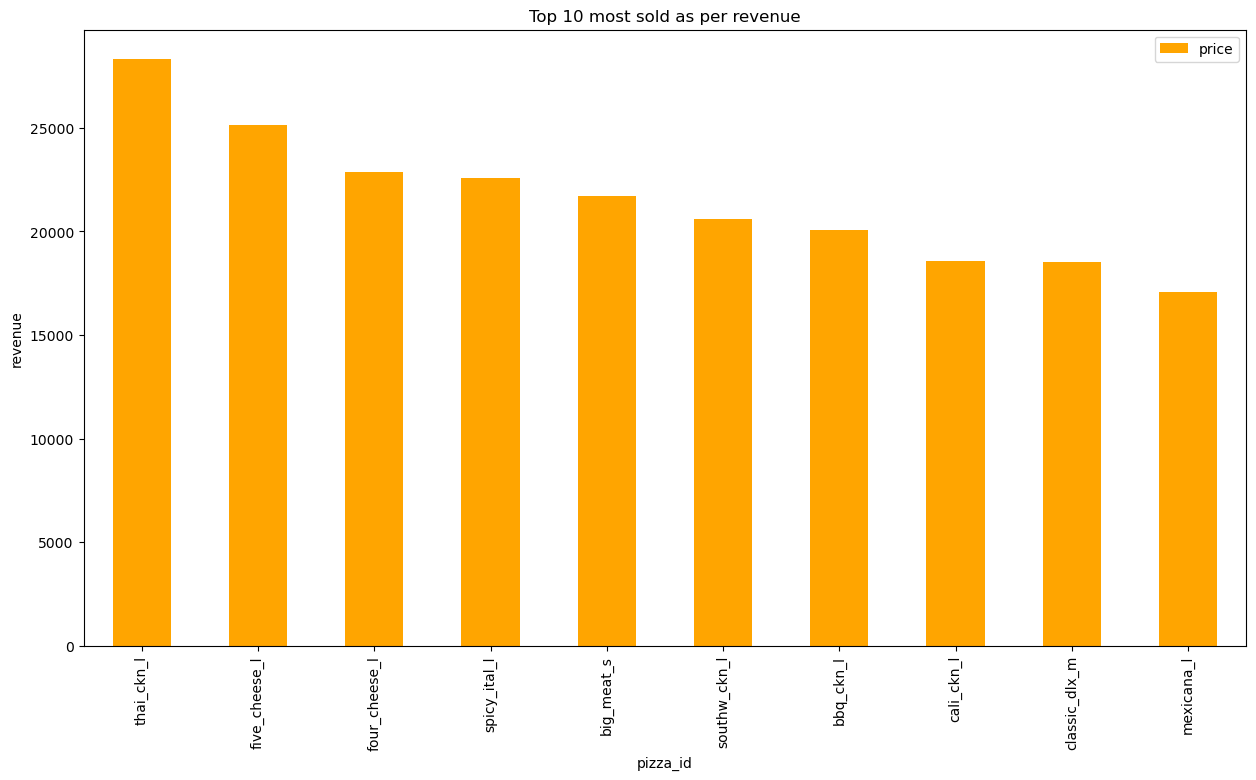

In [63]:
pizza_id_sales.head(10).to_frame().plot(kind='bar',color='orange',figsize=(15,8))
plt.ylabel('revenue')
plt.title('Top 10 most sold as per revenue')

In [45]:
df['pizza_id'].value_counts().head(10)

big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
spicy_ital_l     1088
hawaiian_s       1001
southw_ckn_l      993
bbq_ckn_l         967
bbq_ckn_m         926
Name: pizza_id, dtype: int64

Text(0.5, 1.0, 'Top 10 most sold as per no. of times ordered')

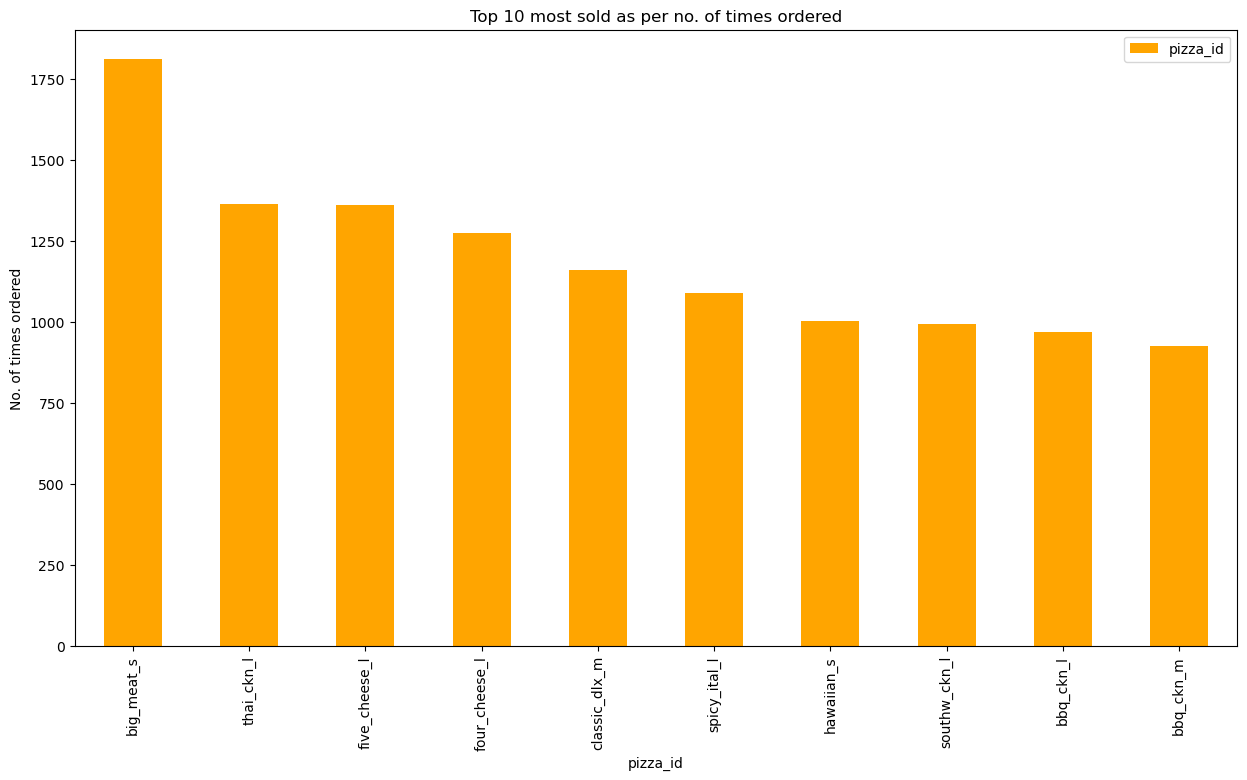

In [46]:
df.groupby('pizza_id').agg('pizza_id').count().sort_values(ascending=False).head(10).to_frame().plot(kind='bar',color='orange',figsize=(15,8))
plt.ylabel('No. of times ordered')
plt.title('Top 10 most sold as per no. of times ordered')

### Conclusion <br>
- highest sales according to revenue- **thai_chn_l**
- highest sales according to quantity -**big_meat_s**
- mostly people order 1 pizza at a time.


# 3.How much money did we make this year? Can we identify any seasonality in the sales?

In [47]:
df['price'].sum()

801944.7000000001

### No. of pizzas ordered per month

In [48]:
df['date'].value_counts().sort_values(ascending=False)

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: date, Length: 358, dtype: int64

In [49]:
df['months'] = pd.to_datetime(df['date'], infer_datetime_format=True).dt.month

In [50]:
df['months'].value_counts().sort_values(ascending=False)

7     4301
5     4239
3     4186
11    4185
1     4156
8     4094
4     4067
6     4025
2     3892
12    3859
9     3819
10    3797
Name: months, dtype: int64

Text(0.5, 1.0, 'No. of pizzas sold per month')

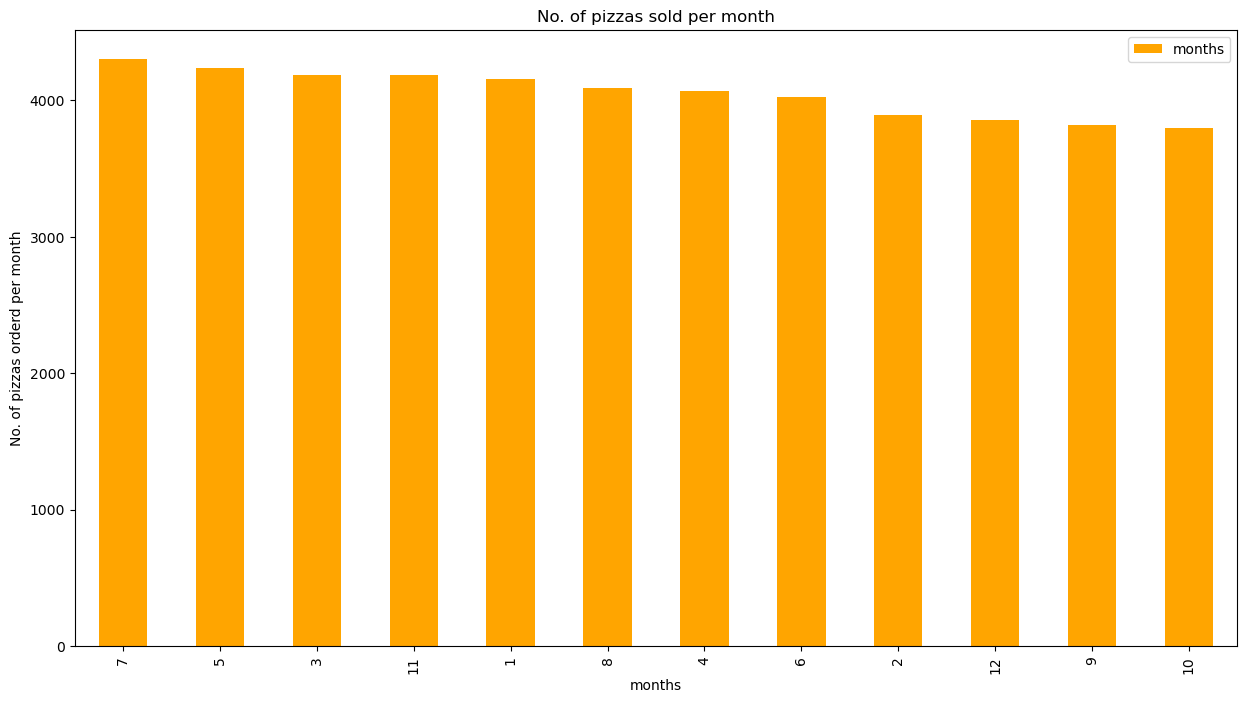

In [51]:
df.groupby('months').agg('months').count().sort_values(ascending=False).to_frame().plot(kind='bar',color='orange',figsize=(15,8))
plt.ylabel('No. of pizzas orderd per month')
plt.title('No. of pizzas sold per month')

### Conclusion <br>
- Total revenue in 2015- **801944.7000000001**
- Highest sale **261** on **Date- 2015-11-26** and second hghest **259** on **Date- 2015-11-27**    
- **July** month has **highest-4301** and **may** has **second highest-4239** sales in the year


# 4.Are there any pizzas we should take off the menu, or any promotions we could leverage?

### least sold as per revenue

In [52]:
pizza_id_sales.tail(10)

pizza_id
the_greek_s       3600.00
ital_cpcllo_s     3600.00
soppressata_s     3600.00
mediterraneo_s    3456.00
ital_supr_s       2425.00
mexicana_s        1920.00
green_garden_l    1903.50
ckn_alfredo_s     1224.00
calabrese_s       1212.75
the_greek_xxl     1006.60
Name: price, dtype: float64

Text(0.5, 1.0, 'Last 10 revenue generated from certain pizza_id')

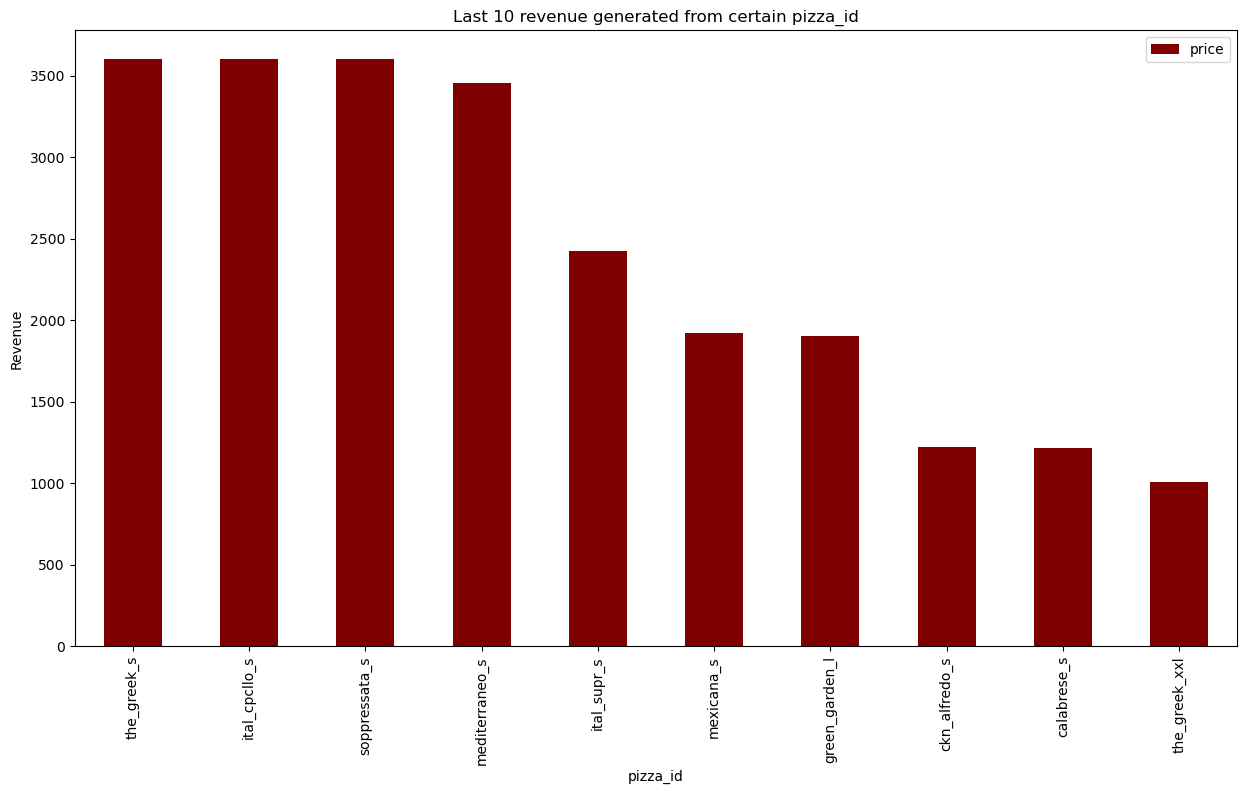

In [53]:
pizza_id_sales.sort_values(ascending=False).tail(10).to_frame().plot(kind='bar',color='maroon',figsize=(15,8))

plt.ylabel('Revenue')
plt.title('Last 10 revenue generated from certain pizza_id')

### least sold as per no of times ordered

In [54]:
df['pizza_id'].value_counts().tail(10)

spinach_supr_m    266
the_greek_l       255
ital_supr_s       194
ital_veggie_l     190
ckn_alfredo_l     187
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: pizza_id, dtype: int64

Text(0.5, 1.0, '10 least sold as per no. of times ordered')

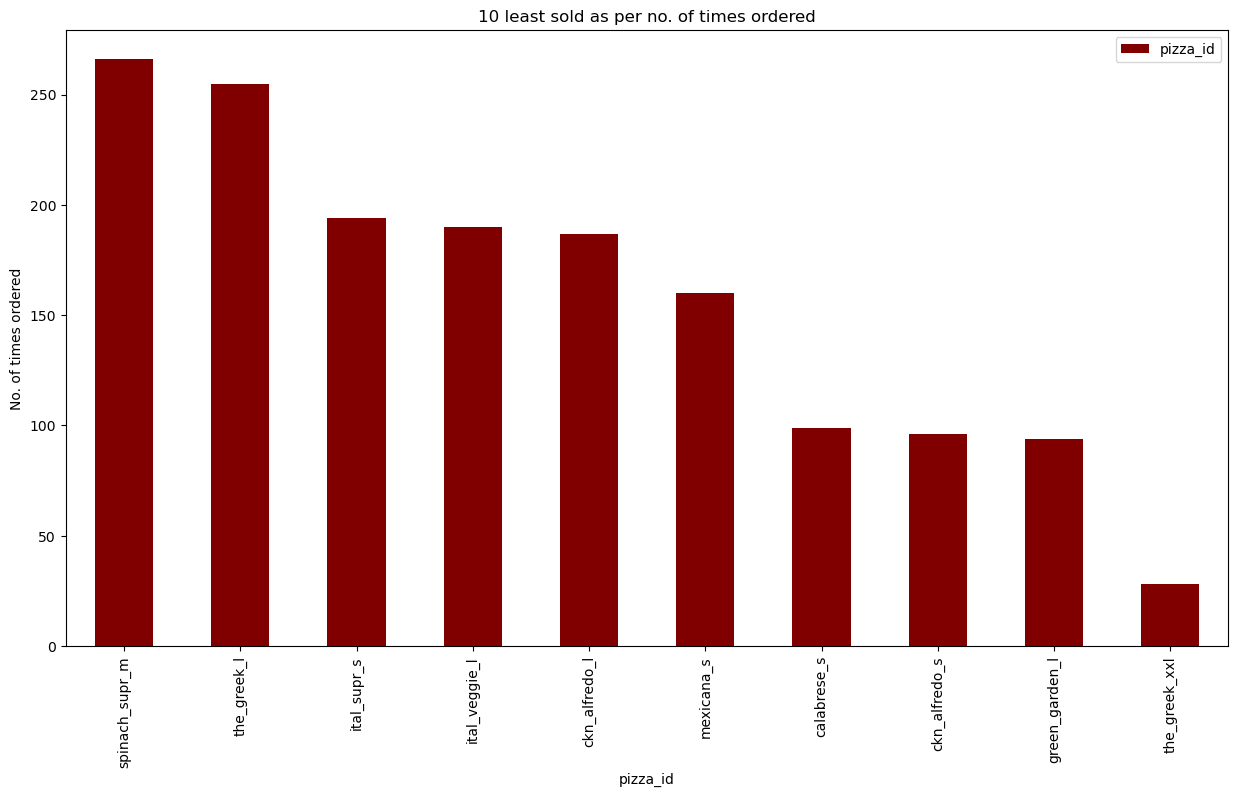

In [58]:
df.groupby('pizza_id').agg('pizza_id').count().sort_values(ascending=False).tail(10).to_frame().plot(kind='bar',color='maroon',figsize=(15,8))

plt.ylabel('No. of times ordered')
plt.title('10 least sold as per no. of times ordered')

### Conclusion <br>
- least revenue **1006.60** given by **the_greek_xxl** and second least revenue **1212.75** given by-**calabrese_s**       
- least sold pizza **28** and the id- **the_greek_xxl** and second least sold pizza **94**, id- **green_garden_l**


In [56]:
df.to_csv('pizza_place_sales_analysis.csv')